In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np


In [24]:
# Učitavanje podataka
data = pd.read_csv("dataset/nvidia.csv")

# Pretvaranje kolone 'Date' u datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Sortiranje po datumu
data = data.sort_values(by="Date")

# Dodavanje novih kolona
data['Daily Range'] = data['High'] - data['Low']
data['Average Price'] = (data['High'] + data['Low']) / 2
data['Volume Change'] = data['Volume'].diff()

# Popunjavanje nedostajućih vrednosti
data.fillna(0, inplace=True)

# Ulazne karakteristike i ciljna vrednost
X = data[['Open', 'High', 'Low', 'Volume', 'Daily Range', 'Average Price', 'Volume Change']]
y = data['Close']

# Podela podataka na trening i test skupove
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linearna regresija 
### Najjednostavniji regresioni model, koji pretpostavlja linearnu vezu između ulaznih karakteristika i ciljne vrednosti (cena zatvaranja).

Mean Squared Error (MSE) za Linear Regression: 0.7634324334536282
Mean Absolute Error (MAE) za Linear Regression: 0.5902316172090398


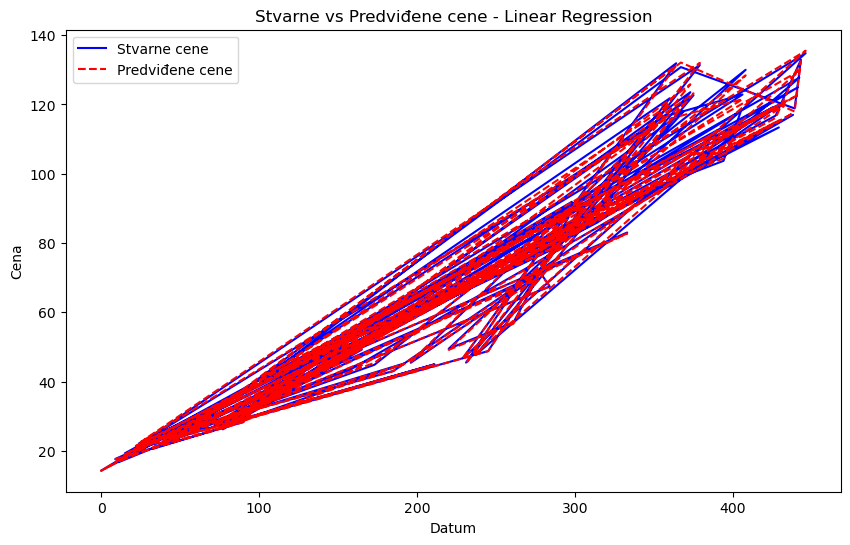

In [25]:
# Trening modela
# Treniranje Linear Regression modela
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predikcija na test podacima
y_pred_lr = model_lr.predict(X_test)

# Evaluacija modela
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f"Mean Squared Error (MSE) za Linear Regression: {mse_lr}")
print(f"Mean Absolute Error (MAE) za Linear Regression: {mae_lr}")

# Vizualizacija stvarnih vs predviđenih vrednosti
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Stvarne cene', color='blue')
plt.plot(y_test.index, y_pred_lr, label='Predviđene cene', color='red', linestyle='dashed')
plt.title('Stvarne vs Predviđene cene - Linear Regression')
plt.xlabel('Datum')
plt.ylabel('Cena')
plt.legend()
plt.show()

# Gradient Boosting model 
### moćan algoritam koji se koristi za regresiju i može dati bolje rezultate od Random Forest u mnogim slučajevima.

In [26]:
# Treniranje Gradient Boosting modela
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)

# Predikcija na test podacima
y_pred_gb = model_gb.predict(X_test)

### Evaluacija modela
#### Nakon što model predvidi cene zatvaranja, možemo evaluirati njegovu tačnost pomoću različitih metrika kao što su Mean Squared Error (MSE) i Mean Absolute Error (MAE).

In [27]:
# Evaluacija modela
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print(f"Gradient Boosting Mean Squared Error (MSE): {mse_gb}")
print(f"Gradient Boosting Mean Absolute Error (MAE): {mae_gb}")

Gradient Boosting Mean Squared Error (MSE): 2.101204648158522
Gradient Boosting Mean Absolute Error (MAE): 1.0067792759633167


### Vizualizacija Predikcija vs Stvarne Vrednosti
####  Vizualizujem kako model predviđa cenu u odnosu na stvarne cene. To može pomoći da procenim preciznost modela.

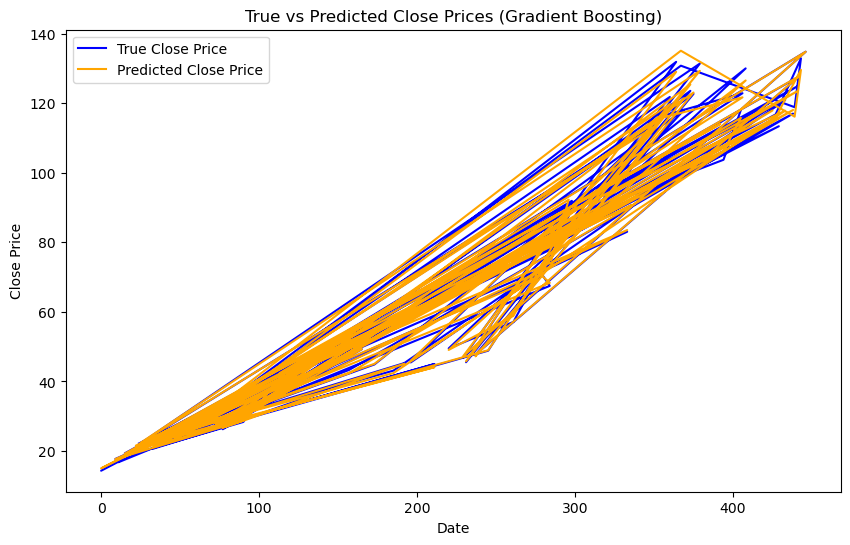

In [28]:
# Vizualizacija stvarnih i predviđenih vrednosti
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='True Close Price', color='blue')
plt.plot(y_test.index, y_pred_gb, label='Predicted Close Price', color='orange')
plt.title("True vs Predicted Close Prices (Gradient Boosting)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


### Predikcija na Novim Podacima
####  Ako želite da koristite model za predikciju buduće cene zatvaranja, možete primeniti trenirani model na novim podacima

In [29]:
# Preuzimanje poslednjih vrednosti iz skupa podataka
last_row = data.iloc[-1]

# Generisanje budućih podataka (npr. za 5 dana)
future_dates = pd.date_range(last_row['Date'], periods=6, freq='B')[1:]  # Izuzimamo prvi datum, već imamo poslednji
future_data = []

# Kreiranje simulovanih vrednosti za buduće dane
for date in future_dates:
    future_row = {
        'Date': date,
        'Open': last_row['Close'] + np.random.uniform(-0.5, 0.5),  # Otvorena cena sa malim varijacijama
        'High': last_row['High'] + np.random.uniform(0, 0.5),  # Najviša cena
        'Low': last_row['Low'] - np.random.uniform(0, 0.5),  # Najniža cena
        'Volume': last_row['Volume'] + np.random.randint(1000000, 10000000),  # Promena u volumenu
    }
    future_data.append(future_row)

# Pretvaranje future_data u DataFrame
future_data_df = pd.DataFrame(future_data, columns=['Date', 'Open', 'High', 'Low', 'Volume'])

# Dodavanje novih kolona na future_data_df
future_data_df['Daily Range'] = future_data_df['High'] - future_data_df['Low']
future_data_df['Average Price'] = (future_data_df['High'] + future_data_df['Low']) / 2
future_data_df['Volume Change'] = future_data_df['Volume'].diff().fillna(0)

# Prikaz novih podataka sa dodatnim kolonama
print(future_data_df)

# Predikcija za nove podatke (future_data_df mora imati iste kolone kao X)
future_pred = model_gb.predict(future_data_df[['Open', 'High', 'Low', 'Volume', 'Daily Range', 'Average Price', 'Volume Change']])

# Prikaz predikcija
print("Predicted Close Prices for future data:")
for i, pred in enumerate(future_pred):
    print(f"Predicted Close Price on {future_data_df['Date'].iloc[i]}: {pred}")

        Date        Open        High         Low     Volume  Daily Range  \
0 2024-10-15  138.472208  139.997371  136.002154  197095106     3.995217   
1 2024-10-16  138.869878  139.912465  136.133316  198349932     3.779149   
2 2024-10-17  138.578762  139.835277  136.142207  191887951     3.693069   
3 2024-10-18  138.358939  139.728596  136.065312  199743908     3.663284   
4 2024-10-21  138.579273  139.882946  136.135905  195020661     3.747041   

   Average Price  Volume Change  
0     137.999762            0.0  
1     138.022891      1254826.0  
2     137.988742     -6461981.0  
3     137.896954      7855957.0  
4     138.009426     -4723247.0  
Predicted Close Prices for future data:
Predicted Close Price on 2024-10-15 00:00:00: 138.42073093285754
Predicted Close Price on 2024-10-16 00:00:00: 138.53242441218904
Predicted Close Price on 2024-10-17 00:00:00: 138.536268891093
Predicted Close Price on 2024-10-18 00:00:00: 138.27821017641793
Predicted Close Price on 2024-10-21 00:00